https://www.kaggle.com/lodetomasi1995/income-classification

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [27]:
df=pd.read_csv('income_evaluation.csv')

# DATA EXPLORATION

In [28]:
col=df.columns.str.lstrip()#removing the space from the left side of the column name
col

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [29]:
col1=np.where(col=='marital-status','marital_status',col)
col2=np.where(col=='education-num','education_num',col1)
col3=np.where(col=='capital-gain','capital_gain',col2)
col4=np.where(col=='capital-loss','capital_loss',col3)
col5=np.where(col=='hours-per-week','hours_per_week',col4)
col6=np.where(col=='native-country','native_country',col5)

In [30]:
col6

array(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'], dtype=object)

In [31]:
df.columns=col6

In [32]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [33]:
df.info()#checking if null values exists or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [34]:
df['occupation'].unique()#checking for garbage values such as '?'

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [35]:
df[df == ' ?'] = np.nan

In [36]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', nan, ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [37]:
df[df['workclass'].isnull()]
#workclass, occupation, native-country were the columns with null values

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
69,25,NaN,200681,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,NaN,212759,10th,6,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,<=50K
106,17,NaN,304873,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,NaN,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
32531,30,NaN,33811,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
32541,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


Upon checking the values we found that features workclass and occupation have same observations with null values and since these are categorical variables, we are going to remove these observations from the dataset

In [38]:
df.drop(df[df['workclass'].isnull()].index,axis=0,inplace=True)#deleting 1836 records with null values

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30725 entries, 0 to 32560
Data columns (total 15 columns):
age               30725 non-null int64
workclass         30725 non-null object
fnlwgt            30725 non-null int64
education         30725 non-null object
education_num     30725 non-null int64
marital_status    30725 non-null object
occupation        30718 non-null object
relationship      30725 non-null object
race              30725 non-null object
sex               30725 non-null object
capital_gain      30725 non-null int64
capital_loss      30725 non-null int64
hours_per_week    30725 non-null int64
native_country    30169 non-null object
income            30725 non-null object
dtypes: int64(6), object(9)
memory usage: 3.8+ MB


For rest of the null values in features such as occupation and native-country, we can treat those values as others when creating one-hot vectors

In [40]:
#converting sex variable in binary form
df['sex'].value_counts()

 Male      20793
 Female     9932
Name: sex, dtype: int64

In [41]:
df.sex[df.sex == ' Male'] = 1
df.sex[df.sex == ' Female'] = 0

In [42]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [43]:
df.workclass[df.workclass == ' Private'] = 'Private'
df.workclass[df.workclass == ' Self-emp-not-inc'] = 'Self_emp'
df.workclass[df.workclass == ' Self-emp-inc'] = 'Self_emp'
df.workclass[df.workclass == ' Local-gov'] = 'Gov'
df.workclass[df.workclass == ' State-gov'] = 'Gov'
df.workclass[df.workclass == ' Federal-gov'] = 'Gov'
df.workclass[df.workclass == ' Without-pay'] = 'Others'
df.workclass[df.workclass == ' Never-worked'] = 'Others'

In [44]:
workclass_cols = pd.get_dummies(df['workclass'], prefix='workclass')
df[workclass_cols.columns] = workclass_cols
df.drop('workclass', axis = 1, inplace =True)

In [45]:
df.head()

,age,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,workclass_Gov,workclass_Others,workclass_Private,workclass_Self_emp
0,39,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,<=50K,1,0,0,0
1,50,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,<=50K,0,0,0,1
2,38,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,<=50K,0,0,1,0
3,53,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,<=50K,0,0,1,0
4,28,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,<=50K,0,0,1,0


In [46]:
df['education'].value_counts()

 HS-grad         9969
 Some-college    6777
 Bachelors       5182
 Masters         1675
 Assoc-voc       1321
 11th            1057
 Assoc-acdm      1020
 10th             833
 7th-8th          574
 Prof-school      558
 9th              463
 Doctorate        398
 12th             393
 5th-6th          303
 1st-4th          156
 Preschool         46
Name: education, dtype: int64

In [47]:
#reducing categories in education by combining them into specific and relevant values
df.education[df.education == ' 12th'] = 'HS_NotGrad'
df.education[df.education == ' 11th'] = 'HS_NotGrad'
df.education[df.education == ' 10th'] = 'HS_NotGrad'
df.education[df.education == ' 9th'] = 'HS_NotGrad'
df.education[df.education == ' 7th-8th'] = 'Below_HS'
df.education[df.education == ' 5th-6th'] = 'Below_HS'
df.education[df.education == ' 1st-4th'] = 'Below_HS'
df.education[df.education == ' Preschool'] = 'Below_HS'
df.education[df.education == ' HS-grad'] = 'HS_grad'
df.education[df.education == ' Some-college'] = 'Some_college'
df.education[df.education == ' Assoc-voc'] = 'Assoc'
df.education[df.education == ' Assoc-acdm'] = 'Assoc'
df.education[df.education == ' Prof-school'] = 'Prof_school'


In [48]:
education_cols = pd.get_dummies(df['education'], prefix='education')
df[education_cols.columns] = education_cols
df.drop('education', axis = 1, inplace =True)

In [49]:
df['marital_status'].value_counts()

 Married-civ-spouse       14340
 Never-married             9917
 Divorced                  4259
 Separated                  959
 Widowed                    840
 Married-spouse-absent      389
 Married-AF-spouse           21
Name: marital_status, dtype: int64

In [50]:
df.marital_status[df.marital_status == ' Married-civ-spouse'] = 'Married'
df.marital_status[df.marital_status == ' Married-spouse-absent'] = 'Married'
df.marital_status[df.marital_status == ' Married-AF-spouse'] = 'Married'
df.marital_status[df.marital_status == ' Never-married'] = 'Never_married'

In [51]:
marital_status_cols = pd.get_dummies(df['marital_status'], prefix='marital_status')
df[marital_status_cols.columns] = marital_status_cols
df.drop('marital_status', axis = 1, inplace =True)

In [52]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [53]:
df.occupation[df.occupation == ' Handlers-cleaners'] = 'Service'
df.occupation[df.occupation == ' Protective-serv'] = 'Service'
df.occupation[df.occupation == ' Priv-house-serv'] = 'Service'
df.occupation[df.occupation == ' Other-service'] = 'Service'
df.occupation[df.occupation == ' Craft-repair'] = 'Service'
df.occupation[df.occupation == ' Machine-op-inspct'] = 'Others'
df.occupation[df.occupation == ' Prof-specialty'] = 'Prof_specialty'
df.occupation[df.occupation == ' Exec-managerial'] = 'Exec_managerial'
df.occupation[df.occupation == ' Adm-clerical'] = 'Adm_clerical'
df.occupation[df.occupation == ' Sales'] = 'Sales'
df.occupation[df.occupation == ' Transport-moving'] = 'Transport_moving'
df.occupation[df.occupation == ' Farming-fishing'] = 'Others'
df.occupation[df.occupation == ' Tech-support'] = 'Tech_support'
df.occupation[df.occupation == ' Armed-Forces'] = 'Others'
df.occupation[df.occupation.isnull()] = 'Others'

In [54]:
occupation_cols = pd.get_dummies(df['occupation'], prefix='occupation')
df[occupation_cols.columns] = occupation_cols
df.drop('occupation', axis = 1, inplace =True)

Since relationship shows current relationship of a person and it is a sub category of the marital status, we will delete this from the dataset


Since education_num is the ordinal variable representing each education level, we will delete this variable as we have already created dummy variables for the education variable

In [55]:
df.drop('education_num',axis=1,inplace=True)
df.drop('relationship',axis=1,inplace=True)

In [56]:
df['race'].value_counts()

 White                 26306
 Black                  2911
 Asian-Pac-Islander      974
 Amer-Indian-Eskimo      286
 Other                   248
Name: race, dtype: int64

In [57]:
df.race[df.race == ' White'] = 'White'
df.race[df.race == ' Black'] = 'Black'
df.race[df.race == ' Asian-Pac-Islander'] = 'Others'
df.race[df.race == ' Amer-Indian-Eskimo'] = 'Others'
df.race[df.race == ' Other'] = 'Others'

In [58]:
race_cols = pd.get_dummies(df['race'], prefix='race')
df[race_cols.columns] = race_cols
df.drop('race', axis = 1, inplace =True)

In [59]:
df = df.reset_index(drop=True)

In [60]:
for i in range(0,30725):
    if df.loc[i,"native_country"]==" United-States":
        df.loc[i,'native_country']='United_States'
    else:
        df.loc[i,'native_country']='Others'

In [61]:
df['native_country'].value_counts()

United_States    27511
Others            3214
Name: native_country, dtype: int64

In [62]:
native_country_cols = pd.get_dummies(df['native_country'], prefix='native_country')
df[native_country_cols.columns] = native_country_cols
df.drop('native_country', axis = 1, inplace =True)

Changing target column 'Income' to binary where 0 is >50K and 1 is <=50K

In [63]:
df.income[df.income == ' >50K'] = 0
df.income[df.income == ' <=50K'] = 1

In [64]:
df['income']=df['income'].astype('uint8')

Below is the final dataset with 38 total features to classify whether the income is above or below 50k

In [65]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30725 entries, 0 to 30724
Data columns (total 38 columns):
age                             30725 non-null int64
fnlwgt                          30725 non-null int64
sex                             30725 non-null object
capital_gain                    30725 non-null int64
capital_loss                    30725 non-null int64
hours_per_week                  30725 non-null int64
income                          30725 non-null uint8
workclass_Gov                   30725 non-null uint8
workclass_Others                30725 non-null uint8
workclass_Private               30725 non-null uint8
workclass_Self_emp              30725 non-null uint8
education_ Bachelors            30725 non-null uint8
education_ Doctorate            30725 non-null uint8
education_ Masters              30725 non-null uint8
education_Assoc                 30725 non-null uint8
education_Below_HS              30725 non-null uint8
education_HS_NotGrad            30725 non-

# DATA PRE-PROCESSING FOR ML

The dataset is a classification dataset and we don't need to maintain the normal distribution, hence we will be using MinMaxScaler() for the dataset

In [66]:
X = df.drop('income', axis = 1)
y = df['income']

In [67]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [68]:
X_train

array([[0.49315068, 0.08484565, 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.4109589 , 0.10298303, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.36986301, 0.05498201, 1.        , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.65753425, 0.10308516, 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.23287671, 0.15951399, 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.21917808, 0.09560538, 1.        , ..., 1.        , 0.        ,
        1.        ]])

In [69]:
X_test

array([[0.30136986, 0.03011304, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.26027397, 0.1668428 , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.09589041, 0.06988311, 1.        , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.43835616, 0.13054582, 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.15068493, 0.08673502, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.21917808, 0.13902099, 1.        , ..., 1.        , 0.        ,
        1.        ]])

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

# Hard Voting

In [83]:
knn_clf = KNeighborsClassifier(25)
knn_clf.fit(X_train, y_train)
svc_clf = SVC(kernel='rbf',C=100,gamma=0.01, probability = True)
svm_clf.fit(X_train, y_train)
dtree_clf = DecisionTreeClassifier(max_depth=8)
dtree_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('knn', knn_clf), ('lsvc', svc_clf),('dtree',dtree_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (knn_clf, svc_clf,dtree_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


KNeighborsClassifier 0.8305128872689403
SVC 0.8462639937516272
DecisionTreeClassifier 0.8539442853423588
VotingClassifier 0.8513407966675345


Hard voting classifier basically predicts the class based on the majority one. From the above results we can conclude that voting classifier is performing almost same as the best model which is Decision Tree having accuracy slightly lower than decision tree

# Soft Voting

In [211]:
knn_clf = KNeighborsClassifier(25)
knn_clf.fit(X_train, y_train)
svc_clf = SVC(kernel='rbf',C=100,gamma=0.01, probability = True)
svc_clf.fit(X_train, y_train)
dtree_clf = DecisionTreeClassifier(max_depth=8)
dtree_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('knn', knn_clf),('svc',svc_clf), ('dtree',dtree_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (knn_clf, svc_clf,dtree_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


KNeighborsClassifier 0.8305128872689403
SVC 0.8462639937516272
DecisionTreeClassifier 0.8539442853423588
VotingClassifier 0.8544649830773237


Soft voting takes the average of all the classifiers and predicts the class with highest probability. From the above results we can conclude that soft voting classifier performs better than all the predictors and hence we can say that soft voting performs better than hard voting for our dataset  

# Bagging

### Decision Tree

In [220]:
from sklearn.ensemble import BaggingClassifier

dtree = DecisionTreeClassifier(max_depth=4)
bag_dtree = BaggingClassifier(dtree, n_estimators=500, max_samples=100, bootstrap=True,oob_score=True, 
                              n_jobs=-1,random_state=0)

bag_dtree.fit(X_train, y_train)
y_pred = bag_dtree.predict(X_test)
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8393647487633429


In [222]:
bag_dtree.fit(X_train, y_train)
print('Train score: {:.4f}'.format(bag_dtree.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_dtree.score(X_test, y_test)))

Train score: 0.8400
Test score: 0.8394


Bagging classifier basically performs sampling with replacement and aggregates all the samples in the end. From the above train and test scores, the classifier has predicted well and when compared to our previous model of decision trees it is performing well at max depth of 4, although the scores have decreased than our original decision tree model.

In [223]:
print('oob score: {:.4f}'.format(bag_dtree.oob_score_))

oob score: 0.8390


Oob score is basically used to evaluate the objects which are not included in the sample as bagging classifier usually samples around 63% of the training set and rest of the instances are called out-of-bag objects. So, oob score of 0.83 indicates that the bagging classifier will achieve about 83.9% of the accuracy and as we can see in our accuracy above it has indeed achieved around 83.9% of accuracy 

### Linear SVC

In [91]:
lsvc = LinearSVC(C = 10)
bag_lsvc = BaggingClassifier(lsvc, n_estimators=500, max_samples=100, bootstrap=True,oob_score=True, n_jobs=-1,random_state=0)

bag_lsvc.fit(X_train, y_train)
y_pred = bag_lsvc.predict(X_test)
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8439208539442853


In [92]:
bag_lsvc.fit(X_train, y_train)
print('Train score: {:.4f}'.format(bag_lsvc.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_lsvc.score(X_test, y_test)))

Train score: 0.8445
Test score: 0.8439


Bagging classifier for linear svc model seems to perform better than our original model with slightly higher training score than the original linear svc model

In [94]:
print('oob score: {:.4f}'.format(bag_lsvc.oob_score_))

oob score: 0.8445


# Pasting

### Decision Tree

In [226]:
dtree = DecisionTreeClassifier(max_depth=4)
paste_dtree = BaggingClassifier(dtree, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1,random_state=0)

paste_dtree.fit(X_train, y_train)
y_pred = paste_dtree.predict(X_test)
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8394949231970841


In [227]:
paste_dtree.fit(X_train, y_train)
print('Train score: {:.4f}'.format(paste_dtree.score(X_train, y_train)))
print('Test score: {:.4f}'.format(paste_dtree.score(X_test, y_test)))

Train score: 0.8402
Test score: 0.8395


Pasting is a technique which basically samples the training set without replacement and the aggregates. Pasting on decision tree seems to provide decent results at depth equal to 4 with scores slightly lower than the original decision tree

### Linear SVC

In [87]:
lsvc = LinearSVC(C = 10)
paste_lsvc = BaggingClassifier(lsvc, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1,random_state=0)

paste_lsvc.fit(X_train, y_train)
y_pred = paste_lsvc.predict(X_test)
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8439208539442853


In [88]:
paste_lsvc.fit(X_train, y_train)
print('Train score: {:.4f}'.format(paste_lsvc.score(X_train, y_train)))
print('Test score: {:.4f}'.format(paste_lsvc.score(X_test, y_test)))

Train score: 0.8445
Test score: 0.8439


Bagging and pasting provides the same scores at C=10 for linear SVC

# AdaBoosting

### Decision Tree

In [113]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=8),
                             n_estimators=200, algorithm="SAMME.R", learning_rate=0.001, random_state=0)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=8,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [114]:
print('Train score: {:.4f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(ada_clf.score(X_test, y_test)))

Train score: 0.8724
Test score: 0.8507


Adaboosting is a technique which learns on the misclassified data points, gradually becoming a strong learner. In the above model, we have applied adaboosting technique on our original model with learning rate of 0.001 and predicted the new boosted score and as we can see, the training score has slightly improved than the original score which was 0.8559. This is because a smaller learning rate allows for very small change in the weight of the misclassified data point, hence not boosting the score too much

In [117]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=8),
                             n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=8,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [119]:
print('Train score: {:.4f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(ada_clf.score(X_test, y_test)))

Train score: 0.9999
Test score: 0.8330


Here we have used learning rate of 0.5 allowing the weight of the misclassified data point to increase in the next classifier by half of what it was in the previous classifier. This boosted the training score tremendously making the training set to overfit the data 

### Linear SVC

In [60]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(LinearSVC(C=10),
                             n_estimators=100, algorithm="SAMME", learning_rate=0.8,random_state=0)
ada_clf.fit(X_train, y_train) 

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=LinearSVC(C=10, class_weight=None, dual=True,
                                            fit_intercept=True,
                                            intercept_scaling=1,
                                            loss='squared_hinge', max_iter=1000,
                                            multi_class='ovr', penalty='l2',
                                            random_state=None, tol=0.0001,
                                            verbose=0),
                   learning_rate=0.8, n_estimators=100, random_state=0)

In [61]:
print('Train score: {:.4f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(ada_clf.score(X_test, y_test)))

Train score: 0.8444
Test score: 0.8437


In [56]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(LinearSVC(C=10),
                             n_estimators=100, algorithm="SAMME", learning_rate=0.2,random_state=0)
ada_clf.fit(X_train, y_train) 

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=LinearSVC(C=10, class_weight=None, dual=True,
                                            fit_intercept=True,
                                            intercept_scaling=1,
                                            loss='squared_hinge', max_iter=1000,
                                            multi_class='ovr', penalty='l2',
                                            random_state=None, tol=0.0001,
                                            verbose=0),
                   learning_rate=0.2, n_estimators=100, random_state=0)

In [57]:
print('Train score: {:.4f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(ada_clf.score(X_test, y_test)))

Train score: 0.8446
Test score: 0.8439


Since it does not calculate probability we have taken algorithm as SAMME.

We have taken two learning rates for linear svc model which are 0.2 and 0.8 respectively and as we can see from the results adaboost slightly boosts both the models as original training score was around 0.8421, however the change is not much and even with change in learning rates from 0.2 to 0.8, there isn't much change observed in the model.

# Gradient Boosting

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.809
Accuracy on test set: 0.809


Gradient boosting is a boosting method which works by improving on the residual errors instead of adding weights like Adaboost

with extremely small learning rate of 0.01 and max_depth of 3, the gradient boosting provides equal train and test scores, however the scores have reduced than the original model, hence the learning rate needs to be increased in order create a better model

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.5)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.881
Accuracy on test set: 0.863


with learning rate of 0.5 and max_depth of 3, the training and test scores improve, however the training score has improved tremendously indicating slight overfit in the model 

In [345]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.2)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.869
Accuracy on test set: 0.864


As we can see with smaller learning rate, the gradient boosting classifier will require more trees to fit in the training set, hence generalising the dataset and as we can see by lowering the learning rate to 0.2, the score has dropped slightly indicating a proper fit

# Principal Component Analysis

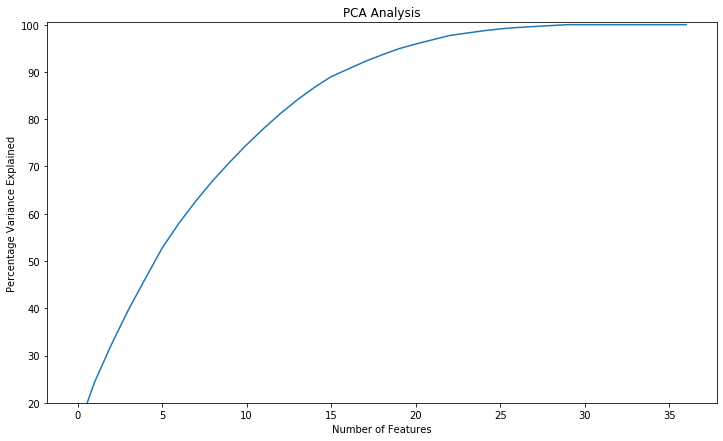

In [232]:
from sklearn.decomposition import PCA
mat = PCA(n_components = 37)#number of components originally in the dataset
mat.fit(X_train)
variance = mat.explained_variance_ratio_ 
var_ratio=np.cumsum(np.round(mat.explained_variance_ratio_, decimals=3)*100)
plt.ylabel('Percentage Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.ylim(20,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var_ratio)

The above plot is an explained variance ratio plot which can be used to identify the number of features explaining the highest amount of variance. As per above plot, we decided number of components to be 26 as most of the variance is being explained in 26 components

In [129]:
pca=PCA(n_components=26)

In [130]:
pca.fit(X_train)
pca.n_components_

26

In [131]:
pca.explained_variance_

array([0.48455632, 0.34444833, 0.27233686, 0.25063449, 0.22509679,
       0.2207961 , 0.18046516, 0.16148736, 0.14594147, 0.13270325,
       0.12800159, 0.11507155, 0.10856444, 0.099604  , 0.08922108,
       0.07754436, 0.05585737, 0.05419676, 0.04700219, 0.04381613,
       0.03517443, 0.03176904, 0.02988302, 0.01812832, 0.01783615,
       0.01361716])

In [132]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [210]:
#Amount of variance not explained
1-pca.explained_variance_ratio_.sum()

0.009410543437615826

As we can see above, training dataset is explaining around 99% of the variance and only 1% of the variance is unexplained

Applying the new training set on all the previous models

# K Neighbors

In [133]:
param_grid = {'n_neighbors': [24,25,26,27]
              }
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'n_neighbors': [24, 25, 26, 27]}


In [134]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True)

In [135]:
grid_search.fit(X_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [24, 25, 26, 27]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [136]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 25}
Best cross-validation score: 0.82


In [137]:
knn = KNeighborsClassifier(25)
knn.fit(X_train_pca, y_train)
scores1 = cross_val_score(knn, X_train_pca, y_train)
scores2 = cross_val_score(knn, X_test_pca, y_test)
print('Train score: {:.4f}'.format(scores1.mean()))
print('Test score: {:.4f}'.format(scores2.mean()))

Train score: 0.8206
Test score: 0.8179


# Logistic Regression

In [140]:
from sklearn.linear_model import LogisticRegression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]
              }
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [141]:

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, return_train_score=True)

In [142]:
grid_search.fit(X_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [143]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10}
Best cross-validation score: 0.82


In [202]:
#Grid Search CV
log = LogisticRegression(C=100)
log.fit(X_train_pca, y_train)
scores1 = cross_val_score(log, X_train_pca, y_train)
scores2 = cross_val_score(log, X_test_pca, y_test)
print('Train score: {:.4f}'.format(scores1.mean()))
print('Test score: {:.4f}'.format(scores2.mean()))

Train score: 0.8237
Test score: 0.8287


# Linear SVC

In [145]:
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [146]:
grid_search = GridSearchCV(LinearSVC(), param_grid, cv=5, return_train_score=True)

In [150]:
grid_search.fit(X_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [151]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10}
Best cross-validation score: 0.82


In [198]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=10)
lsvc.fit(X_train_pca, y_train)
scores1 = cross_val_score(lsvc, X_train_pca, y_train)
scores2 = cross_val_score(lsvc, X_test_pca, y_test)
print('Train score: {:.4f}'.format(scores1.mean()))
print('Test score: {:.4f}'.format(scores2.mean()))

Train score: 0.8236
Test score: 0.8292


# SVC with kernels

### Linear

In [161]:
from sklearn.svm import SVC
svcl = SVC(kernel='linear',C=10)
svcl.fit(X_train_pca, y_train)
scores1 = cross_val_score(svcl, X_train_pca, y_train)
scores2 = cross_val_score(svcl, X_test_pca, y_test)
print('Train score: {:.4f}'.format(scores1.mean()))
print('Test score: {:.4f}'.format(scores2.mean()))

Train score: 0.8220
Test score: 0.8205


### RBF

In [164]:
from sklearn.svm import SVC
svcr = SVC(kernel='rbf',C=100,gamma=0.01)
svcr.fit(X_train_pca, y_train)
scores1 = cross_val_score(svcr, X_train_pca, y_train)
scores2 = cross_val_score(svcr, X_test_pca, y_test)
print('Train score: {:.4f}'.format(scores1.mean()))
print('Test score: {:.4f}'.format(scores2.mean()))

Train score: 0.8193
Test score: 0.8191


### Poly

In [165]:
from sklearn.svm import SVC
svcr = SVC(kernel='poly',C=100,gamma=0.1)
svcr.fit(X_train_pca, y_train)
scores1 = cross_val_score(svcr, X_train_pca, y_train)
scores2 = cross_val_score(svcr, X_test_pca, y_test)
print('Train score: {:.4f}'.format(scores1.mean()))
print('Test score: {:.4f}'.format(scores2.mean()))

Train score: 0.8146
Test score: 0.8083


# Decision Tree

In [207]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6)
dtree.fit(X_train_pca, y_train)
print('Train score: {:.4f}'.format(dtree.score(X_train_pca, y_train)))
print('Test score: {:.4f}'.format(dtree.score(X_test_pca, y_test)))

Train score: 0.8234
Test score: 0.8155


# PCA comparison with original models

In [199]:
M={'Model_Name':['KNN','Logistic','Linear SVC','SVC Kernel Linear','SVC Kernel RBF','SVC Kernel Poly','Decision Tree'],
      'Training Score (without PCA)':[0.8242,0.8420,0.8429,0.8391,0.8415,0.8358,0.8559],
       'Test Score (without PCA)':[0.8217,0.8426,0.8421,0.8424,0.8358,0.8279,0.8538],
  'Training Score (with PCA)':[0.8206,0.8237,0.8236,0.8220,0.8193,0.8146,0.8234],
  'Test Score (with PCA)':[0.8179,0.8287,0.8292,0.8205,0.8191,0.8083,0.8155]}
Model=pd.DataFrame(M)
Model


,Model_Name,Training Score (without PCA),Test Score (without PCA),Training Score (with PCA),Test Score (with PCA)
0,KNN,0.8242,0.8217,0.8206,0.8179
1,Logistic,0.8420,0.8426,0.8237,0.8287
2,Linear SVC,0.8429,0.8421,0.8236,0.8292
3,SVC Kernel Linear,0.8391,0.8424,0.8220,0.8205
4,SVC Kernel RBF,0.8415,0.8358,0.8193,0.8191
5,SVC Kernel Poly,0.8358,0.8279,0.8146,0.8083
6,Decision Tree,0.8559,0.8538,0.8234,0.8155


Text(0, 0.5, 'Score')

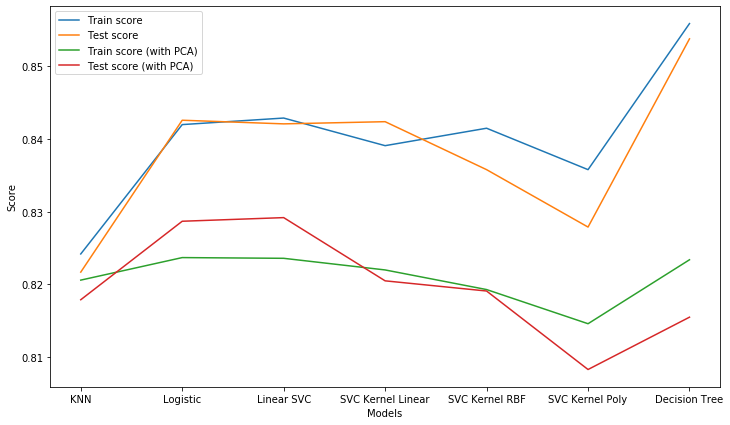

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

Mod_Name=['KNN','Logistic','Linear SVC','SVC Kernel Linear','SVC Kernel RBF','SVC Kernel Poly','Decision Tree']
Training_Score=[0.8242,0.8420,0.8429,0.8391,0.8415,0.8358,0.8559]
Test_Score=[0.8217,0.8426,0.8421,0.8424,0.8358,0.8279,0.8538]
plt.rcParams['figure.figsize']=(12,7)
plt.plot(Mod_Name, Training_Score, label = 'Train score')
plt.plot(Mod_Name, Test_Score, label = 'Test score')
plt.legend()
plt.xlabel('Models')
plt.ylabel('Score')

Mod_Name=['KNN','Logistic','Linear SVC','SVC Kernel Linear','SVC Kernel RBF','SVC Kernel Poly','Decision Tree']
Training_Score_PCA=[0.8206,0.8237,0.8236,0.8220,0.8193,0.8146,0.8234]
Test_Score_PCA=[0.8179,0.8287,0.8292,0.8205,0.8191,0.8083,0.8155]
plt.rcParams['figure.figsize']=(12,7)
plt.plot(Mod_Name, Training_Score_PCA, label = 'Train score (with PCA)')
plt.plot(Mod_Name, Test_Score_PCA, label = 'Test score (with PCA)')
plt.legend()
plt.xlabel('Models')
plt.ylabel('Score')

Insights and Conclusion:
1. From the above graph, we can observe that there is a drop in training and test scores than the previous models. It is simply because of the reduced dimensionality which causes the score to drop, however the drop is very minimal as all the PCA models follows the trend around 0.82 which is slightly lower than 0.84
2. Previously, logistic and SVC with linear kernel were bad models and rest of the models performed well. In PCA model, linear SVC is underfitting along with logistic, however SVC with linear kernel has improved with PCA and also the fit of the SVC with rbf kernel has also improved.
3. Overall with PCA, the models have improved with most of the models performing good with reduced dimensions.

# Deep Learning Algorithm

In [70]:
from keras.models import Sequential
from keras.layers import Dense
import numpy

# fix random seed for reproducibility
numpy.random.seed(10)

In [74]:
# create model
model = Sequential()
model.add(Dense(15, input_dim=37, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

created a multilayered perceptron with 4 hidden layers and each hidden layer has 8 nodes

In [75]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

since it is a classification model, we have used binary cross entropy as the loss function with adam as the optimizer and accuracy as the metrics 

In [76]:
# Fit the model
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
23043/23043 [==============================] - 7s 284us/step - loss: 0.3907 - accuracy: 0.8155
Epoch 2/150
23043/23043 [==============================] - 6s 258us/step - loss: 0.3511 - accuracy: 0.8346
Epoch 3/150
23043/23043 [==============================] - 6s 265us/step - loss: 0.3407 - accuracy: 0.8400
Epoch 4/150
23043/23043 [==============================] - 6s 257us/step - loss: 0.3387 - accuracy: 0.8390
Epoch 5/150
23043/23043 [==============================] - 6s 276us/step - loss: 0.3361 - accuracy: 0.8419
Epoch 6/150
23043/23043 [==============================] - 2s 89us/step - loss: 0.3339 - accuracy: 0.8428
Epoch 7/150
23043/23043 [==============================] - 2s 81us/step - loss: 0.3328 - accuracy: 0.8428
Epoch 8/150
23043/23043 [==============================] - 2s 81us/step - loss: 0.3317 - accuracy: 0.8445
Epoch 9/150
23043/23043 [==============================] - 2s 79us/step - loss: 0.3298 - accuracy: 0.8424
Epoch 10/150
23043/23043 [===============

model is fit using epochs of 150 which gives the number od iterations on batches with size of 10

In [77]:
# evaluate the model
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

7682/7682 [==============================] - 0s 13us/step

accuracy: 84.68%


The accuracy of our perceptron has increased using the above model criteria than most of the regular machine learning models